In [100]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

#    GRADIENT DESCENT

In [101]:
#Define Function  
def F(w1,w2):
    f = (w1**2 +w2 -11)**2 + (w1 + w2**2 -7)**2
    return f

In [102]:
#Numerically Calculate Partial Derivatives
def Derivatives(w1,w2):
    h=.001
    dw1 = (F(w1+h,w2) - F(w1,w2))/h
    dw2 = (F(w1,w2+h) - F(w1,w2))/h
    diff = np.matrix([dw1,dw2]).T
    return diff

In [103]:
#Find Minimum
def FindMin(w0,diff,a):
    iterations = 0
    while(np.linalg.norm(diff) >= 10**-12):
        if iterations >= 10000:
            return "Failure"
        w0 = w0 - np.multiply(a,diff)
        w1 = w0[0,0]
        w2 = w0[1,0]
        diff = Derivatives(w1,w2)
        norm = np.linalg.norm(diff)
        iterations +=1
    print("Minimum is ",w0.T,". Number of iterations is ",iterations,".")
    return norm

# Initialize Gradient Descent: w0 = [0,-4]

In [104]:
#Initialize Gradient Descent w0 = [0,-4].T w/ a= .005

#A.Define Step Size
a = .005

#B.Initial Matrix
w0 = np.matrix([0,-4]).T

#C.Gradient Vector
w1 = w0[0,0]
w2 = w0[1,0]
diff = Derivatives(w1,w2)

#D.Find Min
w = FindMin(w0,diff,a)
print(w)

Minimum is  [[-3.77998412 -3.2839017 ]] . Number of iterations is  93 .
8.203920644156191e-13


In [105]:
#Initialize Gradient Descent w0 = [0,-4].T w/ a= .01

#A. Define Step Size
a = .01

#B. Find Min
w = FindMin(w0,diff,a)
print(w)

Minimum is  [[-3.77998412 -3.2839017 ]] . Number of iterations is  38 .
4.4152277679360096e-13


Convergence Speed of Gradient Descent: As the above examples indicate, the step size is inversely proportional to the number of iterations it takes for the gradient descent to converge. The higher the step size, the faster the convergence speed. 

# Gradient Descent w/ Four Different Initializations

In [106]:
#Step Size
a = .01

#1. w0= [0,-4].T
w0 = np.matrix([0,-4]).T
diff = Derivatives(w0[0,0],w0[1,0])
print("Part 1:")
wa = FindMin(w0,diff,a)
print(wa)

#2. w0 = [.5,-4].T
w0 = np.matrix([.5,-4]).T
diff = Derivatives(w0[0,0],w0[1,0])
print("Part 2:")
wb = FindMin(w0,diff,a)
print(wb)

#3. w0 = [0,4].T
w0 = np.matrix([0,4]).T
diff = Derivatives(w0[0,0],w0[1,0])
print("Part 3:")
wc = FindMin(w0,diff,a)
print(wc)

#4. w0 = [.5,4].T
w0 = np.matrix([.5,4]).T
diff = Derivatives(w0[0,0],w0[1,0])
print("Part 4:")
wd = FindMin(w0,diff,a)
print(wd)

Part 1:
Minimum is  [[-3.77998412 -3.2839017 ]] . Number of iterations is  38 .
4.4152277679360096e-13
Part 2:
Minimum is  [[ 3.58395399 -1.84851412]] . Number of iterations is  91 .
8.239717833128233e-13
Part 3:
Minimum is  [[-2.80560817  3.13082042]] . Number of iterations is  41 .
9.87743736781641e-13
Part 4:
Minimum is  [[2.99956614 1.99975511]] . Number of iterations is  111 .
8.27942237298517e-13


As the outputs of each global descent indicates, the solutions to each problem are different. This also indcates that the outputs represent local minima values instead of global minima values. 

Text(0.5,1,'Contour Plot')

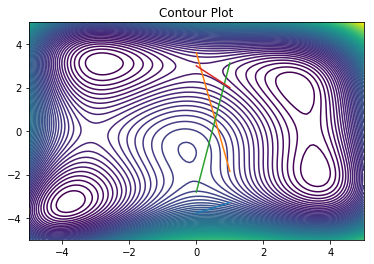

In [107]:
#Contour Plot
fig = plt.figure()
w1 = np.linspace(-5,5,101)
w2 = np.linspace(-5,5,101)
x,y = np.meshgrid(w1,w2)
contours = plt.contour(x,y,F(x,y),100)
plt.plot(np.transpose([-3.77998412,-3.2839017]))
plt.plot(np.transpose([3.5895399,-1.84851412]))
plt.plot(np.transpose([-2.805060817,3.13082042]))
plt.plot(np.transpose([2.99956614,1.99975511]))
plt.title('Contour Plot')

# Parameter Estimation

In [108]:
from scipy.stats import multivariate_normal

In [109]:
#Mean Vector
mean = np.array([-1,0,4,1,.5]).T
cov = 2*np.identity(5)

In [111]:
#Estimated Mean Vector for j=1 
j = 1
N1 = 10**j
x = np.random.uniform(size=(10**j,1))
mn = multivariate_normal(mean=mean, cov=cov)
samples = mn.rvs(size=(10**j,1))
estimated_mean = np.mean(samples, axis=0).T

#Instantaneous Error for j=1
mean_difference = np.subtract(estimated_mean,mean)
err1 = np.square(np.linalg.norm(mean_difference))

print("Estimated mean vector is ",estimated_mean,". Error is ",err1,".")


Estimated mean vector is  [-1.1254986  -0.00982798  4.22499761  1.00621336  1.05234754] . Error is  0.37159682271208727 .


In [112]:
#Estimated Mean Vector for j=2
j = 2
N2 = 10**j
x = np.random.uniform(size=(10**j,1))
mn = multivariate_normal(mean=mean, cov=cov)
samples = mn.rvs(size=(10**j,1))
estimated_mean = np.mean(samples, axis=0)

#Instantaneous Error for j=2
mean_difference = np.subtract(estimated_mean,mean)
err2 = np.square(np.linalg.norm(mean_difference))

print("Estimated mean vector is ",estimated_mean,". Error is ",err2,".")


Estimated mean vector is  [-0.8205582  -0.10812159  4.21078679  1.07136084  0.49903064] . Error is  0.09341401764885904 .


In [113]:
#Estimated Mean Vector for j=3
j = 3
N3 = 10**j
x = np.random.uniform(size=(10**j,1))
mn = multivariate_normal(mean=mean, cov=cov)
samples = mn.rvs(size=(10**j,1))
estimated_mean = np.mean(samples, axis=0)

#Instantaneous Error for j=3
mean_difference = np.subtract(estimated_mean,mean)
err3 = np.square(np.linalg.norm(mean_difference))

print("Estimated mean vector is ",estimated_mean,". Error is ",err3,".")


Estimated mean vector is  [-0.94635644 -0.00438471  4.00478792  0.97990896  0.52154901] . Error is  0.0037877915175866163 .


In [114]:
#Estimated Mean Vector for j=4
j = 4
N4 = 10**j
x = np.random.uniform(size=(10**j,1))
mn = multivariate_normal(mean=mean, cov=cov)
samples = mn.rvs(size=(10**j,1))
estimated_mean = np.mean(samples, axis=0)

#Instantaneous Error for j=4
mean_difference = np.subtract(estimated_mean,mean)
err4 = np.square(np.linalg.norm(mean_difference))

print("Estimated mean vector is ",estimated_mean,". Error is ",err4,".")


Estimated mean vector is  [-0.99707821 -0.01656689  4.00433111  0.99616048  0.50463639] . Error is  0.0003379950745425691 .


In [115]:
#Estimated Mean Vector for j=5
j = 5
N5 = 10**j
x = np.random.uniform(size=(10**j,1))
mn = multivariate_normal(mean=mean, cov=cov)
samples = mn.rvs(size=(10**j,1))
estimated_mean = np.mean(samples, axis=0)

#Instantaneous Error for j=5
mean_difference = np.subtract(estimated_mean,mean)
err5 = np.square(np.linalg.norm(mean_difference))

print("Estimated mean vector is ",estimated_mean,". Error is ",err5,".")


Estimated mean vector is  [-9.96733492e-01  3.05099000e-03  3.99745176e+00  9.98969917e-01
  4.93993147e-01] . Error is  6.361550754909381e-05 .


In [116]:
#Estimated Mean Vector for j=6
j = 6
N6 = 10**j
x = np.random.uniform(size=(10**j,1))
mn = multivariate_normal(mean=mean, cov=cov)
samples = mn.rvs(size=(10**j,1))
estimated_mean = np.mean(samples, axis=0)

#Instantaneous Error for j=6
mean_difference = np.subtract(estimated_mean,mean)
err6 = np.square(np.linalg.norm(mean_difference))

print("Estimated mean vector is ",estimated_mean,". Error is ",err6,".")


Estimated mean vector is  [-9.99708934e-01  1.47211244e-03  4.00128081e+00  9.99756595e-01
  5.02888123e-01] . Error is  1.229281903269835e-05 .


Text(0,0.5,'Values of eN')

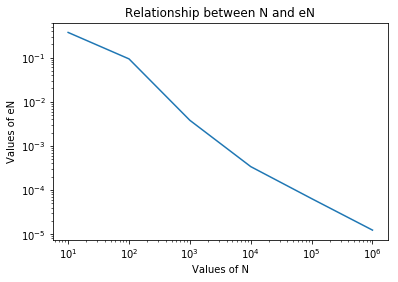

In [117]:
#Log-log plot of eN and N
eN = np.array([err1,err2,err3,err4,err5,err6])
N = np.array([N1,N2,N3,N4,N5,N6])
fig, ax = plt.subplots()
ax.loglog(N,eN)
plt.title('Relationship between N and eN')
plt.xlabel('Values of N')
plt.ylabel('Values of eN')

Relationship between eN and N: The log-log plot indicates that as N increases,eN of decreases. 